In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#Library for feature selection techniques]
from sklearn.feature_selection import RFECV

#libraries for various ML models 
from sklearn.neighbors import KNeighborsClassifier
#ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [3]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Genuine','Imposter']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [6]:
data = pd.read_csv("C:\\Users\\Gaurav\\Desktop\\p3\\Data\\KeystrokeData.csv")
data.head()

,User,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,Target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.328,0.225,0.135,0.264,0.129,0.111,0.311,0.200,0.112,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119,Genuine


In [7]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'Target'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             1422 non-null   object 
 1   H.period         1422 non-null   float64
 2   DD.period.t      1422 non-null   float64
 3   UD.period.t      1422 non-null   float64
 4   H.t              1422 non-null   float64
 5   DD.t.i           1422 non-null   float64
 6   UD.t.i           1422 non-null   float64
 7   H.i              1422 non-null   float64
 8   DD.i.e           1422 non-null   float64
 9   UD.i.e           1422 non-null   float64
 10  H.e              1422 non-null   float64
 11  DD.e.five        1422 non-null   float64
 12  UD.e.five        1422 non-null   float64
 13  H.five           1422 non-null   float64
 14  DD.five.Shift.r  1422 non-null   float64
 15  UD.five.Shift.r  1422 non-null   float64
 16  H.Shift.r        1422 non-null   float64
 17  DD.Shift.r.o  

In [9]:
data['User'].value_counts()

User
Nikhil      710
Deepti      225
Huy         200
Shridhar     50
Vikram       38
Vishu        33
Tarang       33
Sushmit      25
Rohan        25
Abhishek     24
Tejas C      23
Tejas S      22
Rutvik       14
Name: count, dtype: int64

In [10]:
data['Target'].value_counts()

Target
Imposter    712
Genuine     710
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

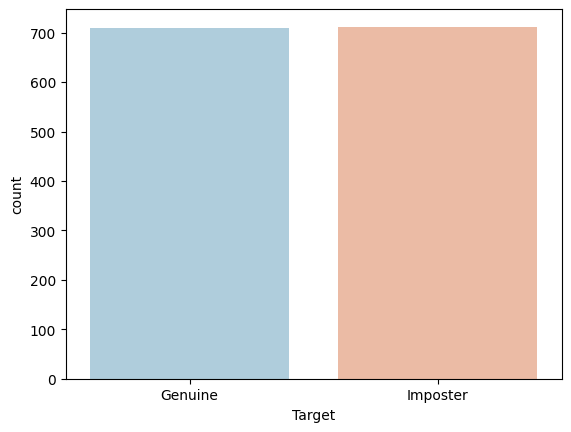

In [11]:
sns.countplot(x='Target',data=data,palette='RdBu_r')

In [12]:
features = list(data.columns[1:32])
X = data[features]
y = data['Target']
train, test = train_test_split(data, test_size = 0.2)
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

In [13]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9929893236554197
Accuracy Score:  0.9929824561403509


[np.float64(0.9824812089762391), np.float64(0.9929893236554197), np.float64(0.9929893236554197), np.float64(0.9929893236554197), np.float64(0.9929893236554197), np.float64(0.9894887253857435), np.float64(0.9894887253857435), np.float64(0.9894887253857435)]


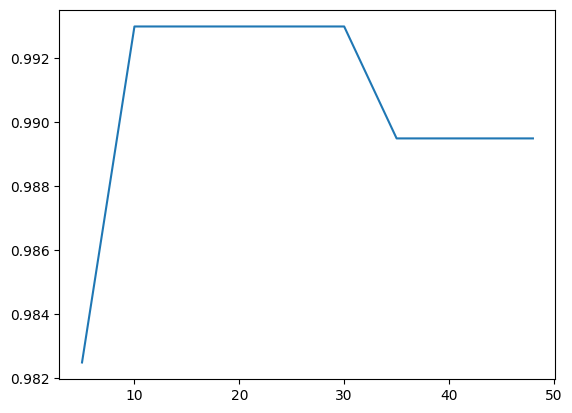

In [14]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,48]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

F1 Score:  0.9894887253857435
Accuracy Score:  0.9894736842105263
[[160   3]
 [  0 122]]


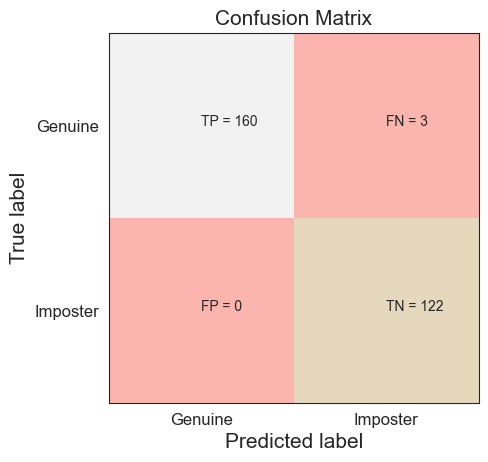

In [15]:
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=30)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=30)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

In [16]:

clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index(['H.period', 'DD.period.t', 'UD.period.t', 'DD.t.i', 'UD.t.i', 'H.i',
       'DD.i.e', 'H.e', 'UD.e.five', 'DD.five.Shift.r', 'UD.five.Shift.r',
       'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'H.n', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')


In [17]:
st  = "0.122,0.267,0.145,0.143,0.2,0.057,0.135,0.36,0.225,0.15,1.6,1.45,0.231,0.8,0.569,0.335,0.224,-0.111,0.167,0.247,0.08,0.127,0.232,0.105,0.168,0.312,0.144,0.28,0.2,-0.08,0.128"
li = list(st.split(','))


In [18]:
ar = np.array(li)
arr = ar.reshape(1,31)

In [19]:
arr.shape

(1, 31)

In [20]:
ans = rfecv.predict(arr)
ans[0]

'Genuine'